In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

import warnings
warnings.filterwarnings('ignore')

In [216]:
data = pd.read_csv('/Users/ankusmanish/Desktop/Desktop/Training/Datasets/Week 12/Mall_Customers.csv')

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [218]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [219]:
data.drop(['CustomerID','Genre', 'Age'], axis = 1, inplace = True)

In [220]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


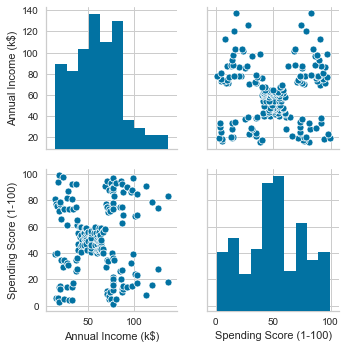

In [221]:
sea.pairplot(data)

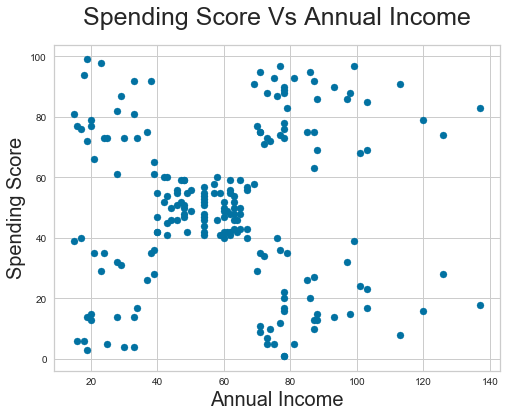

In [222]:
plt.figure(figsize = (8,6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income', fontsize = 20)
plt.ylabel('Spending Score', fontsize = 20)
plt.title('Spending Score Vs Annual Income', fontsize = 25, pad = 20)
plt.show()

In [223]:
X = data.iloc[:,:].values

## Finding the right K value

Total time taken : 0.5827281475067139


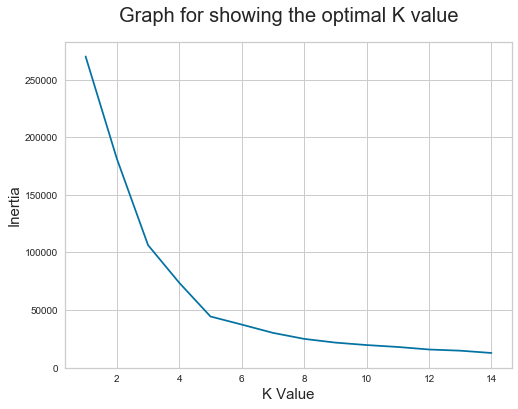

In [224]:
start_time = time.time()
SSD = []

for i in range(1,15):
    clf = KMeans(n_clusters = i)
    clf.fit(data)
    SSD.append(clf.inertia_)
print('Total time taken : {}'.format(time.time() - start_time))

plt.figure(figsize = (8,6))
plt.plot(range(1,15), SSD, 'bx')
plt.plot(range(1,15), SSD)
plt.xlabel('K Value', fontsize = 15)
plt.ylabel('Inertia', fontsize = 15)
plt.title('Graph for showing the optimal K value', fontsize = 20, pad = 20)
plt.show()

## Another way for K value

In [225]:
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,15):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(data)
    centers = km.cluster_centers_

    score = silhouette_score(data, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2968969162503008
For n_clusters = 3, silhouette score is 0.46761358158775435
For n_clusters = 4, silhouette score is 0.4931963109249047
For n_clusters = 5, silhouette score is 0.553931997444648
For n_clusters = 6, silhouette score is 0.53976103063432
For n_clusters = 7, silhouette score is 0.5321706886465517
For n_clusters = 8, silhouette score is 0.45481197931195283
For n_clusters = 9, silhouette score is 0.45819645551960536
For n_clusters = 10, silhouette score is 0.4494755585987857
For n_clusters = 11, silhouette score is 0.43560008750473395
For n_clusters = 12, silhouette score is 0.42507724579994494
For n_clusters = 13, silhouette score is 0.41870926222608434
For n_clusters = 14, silhouette score is 0.42968398655548073


In [226]:
def model(data):
    #defining number of cluster you want
    n_clusters = 5

    clf = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 100)
    clf.fit(data)
    
    print('The centroids for the clusters are: \n')
    print(clf.cluster_centers_)
    
    y_pred = clf.predict(data)
            
    #plot on train data
    plt.figure(figsize = (8,6))
    colour_lis = ['g','b','y','grey','pink','g','b','y','grey','pink']
    plt.xlabel('Annual Income', fontsize = 20)
    plt.ylabel('Spending Score', fontsize = 20)
    plt.title('Centroid On training data', fontsize = 25, pad = 20)
    labels = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6','Cluster7','Cluster8','Cluster9',]
    for i in range(len(clf.cluster_centers_)):
        plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], s = 100, c = colour_lis[i], label = labels[i])
        plt.scatter(clf.cluster_centers_[i][0],clf.cluster_centers_[i][1], c = 'black', s = 200, marker = 's')
    plt.legend()
    plt.show() 
    
    return y_pred


The centroids for the clusters are: 

[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


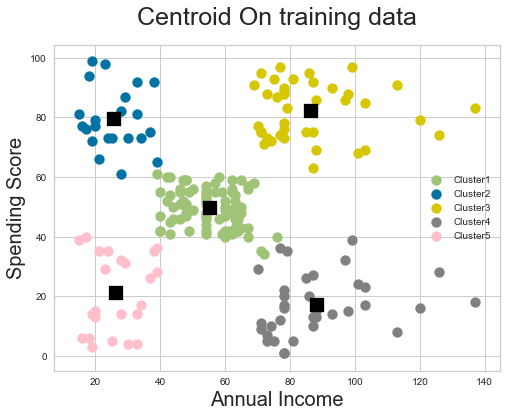

In [227]:
y_pred = model(data)

In [228]:
from sklearn.metrics import silhouette_score

In [229]:
score = silhouette_score(data, y_pred, metric='euclidean')
print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 14, silhouette score is 0.553931997444648


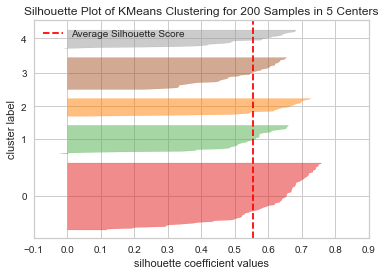

In [230]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(data) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data